In [96]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from IPython.display import HTML

halfsize_figure = (8,3)
fullsize_figure = (16,3)

#Default figure size is smaller figure
plt.rcParams.update({'font.size': 12, 'figure.figsize': fullsize_figure})

stepsize = 0.1

In [97]:
def r(t):
    if t > 0:
        return t
    return 0

def u(t):
    if t >= 0:
        return 1
    return 0


def vector_plot(t, f):
    y = np.zeros((len(t),1))
    for i in range(len(t)):
        y[i] = f(t[i])
    return y

<h1>Introduction</h1>
<p>In this lab we will be comparing the results of numerical (finite) convolutions to the results of mathematical (infinite) convolutions. This will help us to gain experience in convolution computations.</p>
<h1>Methodology</h1>
<p>We will start with defining three functions to use throughout the lab. We will be calculating the step response of each of the three functions, using numerical convolution developed in earlier labs, and mathematical convolution. The step response of a system is simply the output of a system when the forcing function is a unit step. To find this, we convolve the impulse response with the step function, just as we would with any forcing function. Once these calculations are completed, we will graph both the numerical results and the mathematical results and compare to see the limitations of numerical convolution versus the mathematical approach.</p>
<h1>Formulas &amp; Equations</h1>
<p>The user defined functions will be the following:</p>
$$h_1(t)=e^{2t}u(t-1)$$
$$h_2(t)=u(t-2)-u(t-6)$$
$$h_3(t)=cos(\omega_0t)u(t), for f_0 = 0.25Hz$$
<p>Next, we will solve the following integrals to find the step responses of the three functions. As noted above, the step response is simply the convolution of the impulse response with a step function. Thus the integrals are:</p>
$$ s_1(t) = e^{2t}u(t-1)*u(t) = \int_{-\infty}^{t} e^{2\tau}u(1-\tau)u(\tau) d\tau $$
$$ s_2(t) = u(t-2)-u(t-6)*u(t) = \int_{0}^{t} (u(\tau-2)-u(\tau-6)) d\tau $$
$$ s_3(t) = cos(\omega_0t)u(t)*u(t) = \int_{0}^{t} cos(\omega_0\tau)u(\tau) d\tau $$
<p>The results of evaluating the integrals are:</p>
$$ s_1(t) = \frac{1}{2}[e^{2t}u(1-t)+e^{2}u(t-1)] $$
$$ s_2(t) = (r(t-2)-r(t-6))u(t) $$
$$ s_3(t) = \frac{1}{\omega_0}sin(\omega_0t)u(t) $$
<p>These are the results that will be plotted in Part 2, Task 2.</p>


<h1>Procedure &amp; Results</h1>
<h2>Part 1</h2>
<p><b>Goal: </b>To create the three user defined functions.</p>

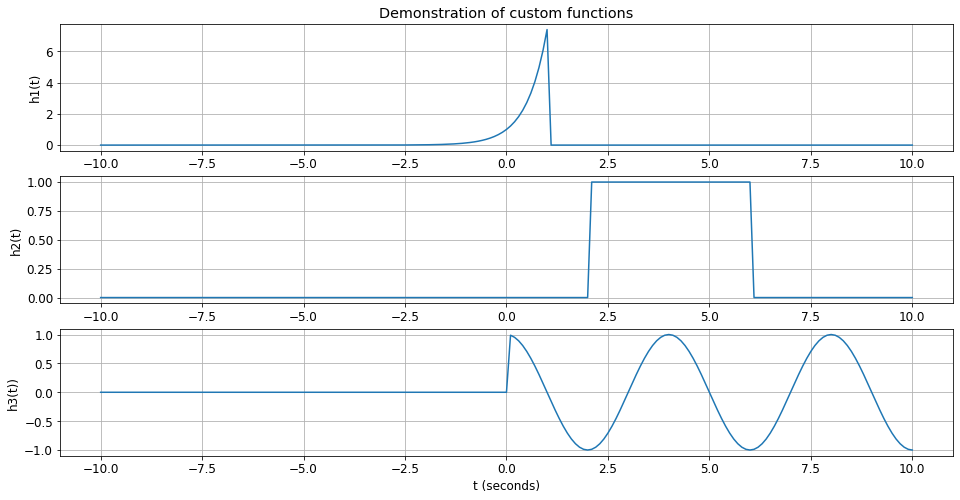

In [98]:
t = np.arange(-10, 10 + stepsize, stepsize)

y1 = h1(t)

y2 = h2(t)

y3 = h3(t)

#plt.figure(figsize=fullsize_figure)

plt.subplots_adjust(top=2,bottom=0)

plt.subplot(3,1,1)
plt.plot(t,y1)
plt.grid(True)
plt.ylabel('h1(t)')
plt.title('Demonstration of custom functions')

plt.subplot(3,1,2)
plt.plot(t,y2)
plt.grid(True)
plt.ylabel('h2(t)')
#plt.title('')


plt.subplot(3,1,3)
plt.plot(t,y3)
plt.grid(True)
plt.ylabel('h3(t))')
plt.xlabel('t (seconds)')
#plt.title('')


plt.show()

<h2>Part 2</h2>
<p><b>Goal: </b>To find and plot the step responses of the user defined functions from part 1</p>
<p><b>Task 1: </b>We first use the convolution function from lab 3 to numerically convolve each function with the unit step.</p>
<p>When examining the plots of the step responses using numerical convolution, I noticed the upper magnitude was significantly higher than it should have been. For example, the plot for the second function reached a maximum of 40 units with numerical convolution. The plot of this is shown below. Note that this error was found in both the custom convolution and the library function <em>scipy.signal.convolve</em>. </p>

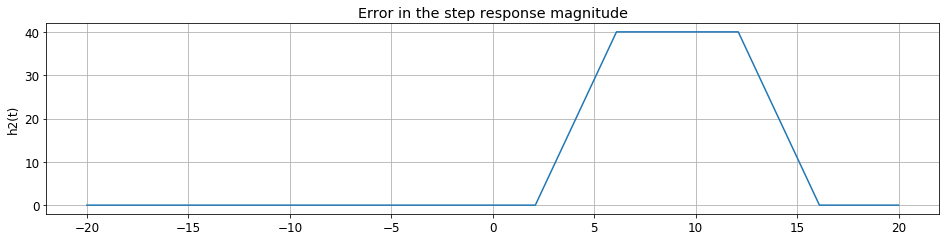

In [99]:
t = np.arange(-10, 10 + stepsize, stepsize)

y1 = h2(t)

ut = vector_plot(t, u)

ys1 = sig.convolve(y1,ut)


t = np.arange(-20, 20 + stepsize, stepsize)

#plt.figure(figsize=fullsize_figure)

plt.subplots_adjust(top=2,bottom=-1)

plt.subplot(3,1,1)
plt.plot(t,ys1)
plt.grid(True)
plt.ylabel('h2(t)')
plt.title('Error in the step response magnitude')

plt.show()

<p>Clearly, this is not correct, the magnitude should only reach a maximum of 4. However, this is explainable, with a step size of 0.1, the plot reaches 40, a 10 times multiplier. This is due to the fact that the convolve functions do not account for the step size (assuming step size of 1 means that the magnitude will be off by a factor of 1/stepsize). However, by adding an additional parameter to the convolution function to scale the output by the step size, we achieve the correct results. The modified custom convolution function is shown below.</p>

In [100]:
def convolve(f1, f2, stepsize):
    y = np.zeros(((len(f1) + len(f2) - 1), 1))
    t_max = len(f1)
    tau_max = len(f2)
    for t in range(t_max):
        for tau in range(tau_max):
            y[t+tau] += f1[t] * f2[tau] * stepsize
    return y

<p>The plotted results are using the newly modified custom convolve function are:</p>

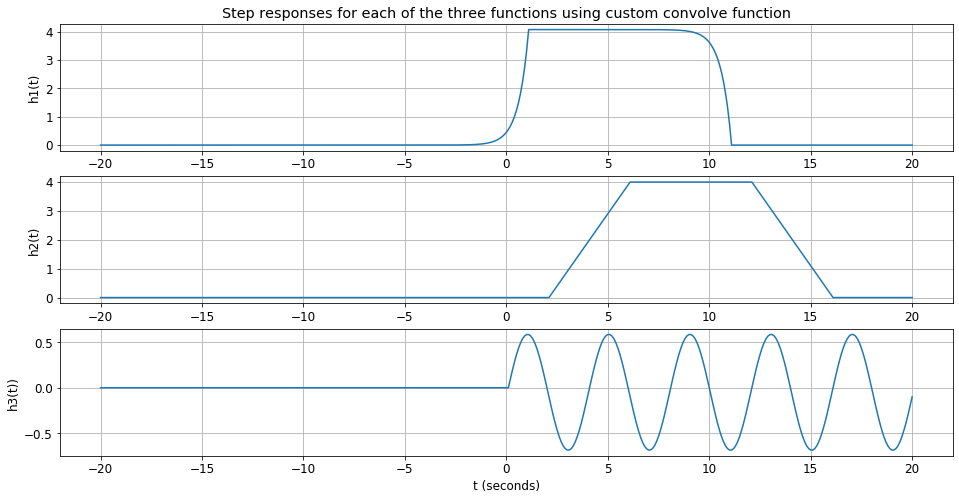

In [101]:
t = np.arange(-10, 10 + stepsize, stepsize)

y1 = h1(t)

y2 = h2(t)

y3 = h3(t)

ut = vector_plot(t, u)

ys1 = convolve(y1,ut,stepsize)
ys2 = convolve(y2,ut,stepsize)
ys3 = convolve(y3,ut,stepsize)

t = np.arange(-20, 20 + stepsize, stepsize)

#plt.figure(figsize=fullsize_figure)

plt.subplots_adjust(top=2,bottom=0)

plt.subplot(3,1,1)
plt.plot(t,ys1)
plt.grid(True)
plt.ylabel('h1(t)')
plt.title('Step responses for each of the three functions using custom convolve function')

plt.subplot(3,1,2)
plt.plot(t,ys2)
plt.grid(True)
plt.ylabel('h2(t)')
#plt.title('')


plt.subplot(3,1,3)
plt.plot(t,ys3)
plt.grid(True)
plt.ylabel('h3(t))')
plt.xlabel('t (seconds)')
#plt.title('')


plt.show()

<p><b>Task 2: </b>Now we solve the convolution integrals by hand and plot the results to compare with what was obtained using numerical convolution in Task 1. The convolution integrals and their solutions were shown in the Formulas &amp; Calculations section. The results are repeated below.</p>
<p>The step response functions obtained earlier are:</p>
$$ s_1(t) = \frac{1}{2}[e^{2t}u(1-t)+e^{2}u(t-1)] $$
$$ s_2(t) = (r(t-2)-r(t-6))u(t) $$
$$ s_3(t) = \frac{1}{\omega_0}sin(\omega_0t)u(t) $$

<p>The code implementing the step response functions is shown in the following listing.</p>

In [102]:
def step_resp_h1(t):
    y = np.zeros((len(t),1))
    for i in range(len(t)):
        y[i] = 0.5 * np.exp(2*t[i])*u(1-t[i]) + 0.5*(np.exp(2))*u(t[i] - 1)
    return y

def step_resp_h2(t):
    y = np.zeros((len(t),1))
    for i in range(len(t)):
        y[i] = r(t[i]-2) - r(t[i]-6)
    return y

def step_resp_h3(t):
    f0 = 0.25
    w = f0*np.pi*2    
    y = np.zeros((len(t),1))
    for i in range(len(t)):
        y[i] = (np.sin(w*t[i])/w)*u(t[i])
    return y

<p>The plots for these functions are in the figure below. Note how the mathematical convolutions do not drop back to 0 before the end of the plot. Yet, the numerical convolutions drop back to 0 before the end of the plot. The mathematical convolution the true solution. This demonstrates how numerical convolutions are limited by the range at which the functions are evaluated</p>

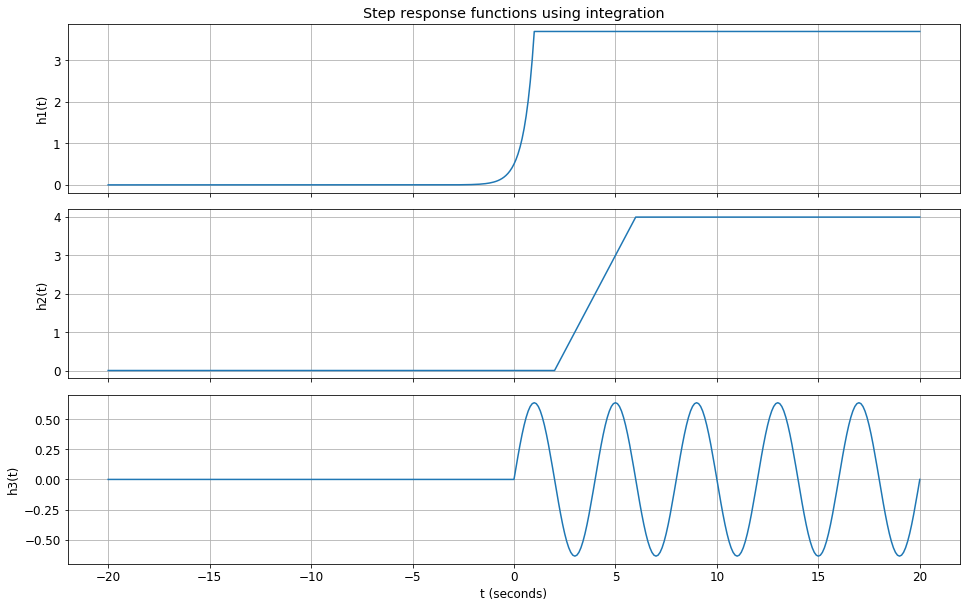

In [103]:
t = np.arange(-10, 10 + stepsize, stepsize)
ut = vector_plot(t, u)


t = np.arange(-20, 20 + stepsize, stepsize)

y1 = step_resp_h1(t)

y2 = step_resp_h2(t)

y3 = step_resp_h3(t)


fig, ((ax1,ax2,ax3)) = plt.subplots(nrows=3,ncols=1,sharex=True)


plt.subplots_adjust(top=2.5,bottom=0, hspace=0.1)

#plt.subplot(3,1,1)
ax1.plot(t,y1)
ax1.grid(True)
ax1.set_ylabel('h1(t)')
ax1.set_title('Step response functions using integration')

#plt.subplot(3,1,2)
ax2.plot(t,y2)
ax2.grid(True)
ax2.set_ylabel('h2(t)')
#plt.title('')


#plt.subplot(3,1,3)
ax3.plot(t,y3)
ax3.grid(True)
ax3.set_ylabel('h3(t)')
ax3.set_xlabel('t (seconds)')
#plt.title('')


plt.show()


<h1>Issues &amp; Errors</h1>
<p>No significant issues were encountered in this lab. However, there seem to be some recurring issues with how to scale and adjust the plot sizes using matplotlib. Some adjustments appear to mess up other (seemingly unrelated) settings. For example, using subplots_adjust and changing the top and bottom values changes the figure size as well, even though, based on the articles found on the internet, the top and bottom adjustments change the spacing around subplots (which does change as well). Also, I attempted to use shared x axis on some of the plots as each set of three plots share a common range in x, but this was significantly more difficult than expected.</p>
<h1>Conclusion</h1>
<p>In this lab, we have looked at numerical convolutions and mathematical convolutions, and compared the two. Numerical convolution can be very accurate, but is limited in range due to the fact that only a finite snapshot of the function is used to calculate the result. However, mathematical convolution gives a full result since the integration is infinite.</p>

<h1>Appendix I: Code for three user defined functions</h1>
<p>Python code for the user defined functions used throughout this lab is shown in the following listing.</p>

In [104]:
def h1(t):
    y = np.zeros((len(t),1))
    for i in range(len(t)):
        y[i] = np.exp(2*t[i])*u(1-t[i])
    return y

def h2(t):
    y = np.zeros((len(t),1))
    for i in range(len(t)):
        y[i] = u(t[i]-2) - u(t[i]-6)
    return y

def h3(t):
    f0 = 0.25
    w = f0*np.pi*2
    y = np.zeros((len(t),1))
    for i in range(len(t)):
        y[i] = np.cos(w*t[i])*u(t[i])
    return y